In [1]:
import pandas as pd
import tensorflow
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense,Dropout,Activation,Conv2D,Reshape
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils import *
import math
import time
import matplotlib.pyplot as plt

/home/ubuntu/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('data/2330.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Vol,MA5,MA10,DIF,MACD9,OSC,K,D
0,2011/7/20,69.7,71.7,69.4,71.6,70.08,70.83,71.79,74.02,58272,59446,55917,-1.15,-1.00,-0.15,32.35%,26.05%
1,2011/7/21,71.4,71.6,70.6,71.6,70.26,70.83,71.66,74.05,33277,55219,54470,-1.04,-1.01,-0.03,46.77%,32.96%
2,2011/7/22,72.4,72.4,71.7,72.0,70.68,70.78,71.62,74.04,38244,45044,52998,-0.88,-0.98,0.10,60.35%,42.09%
3,2011/7/25,72.4,72.5,71.4,72.0,71.14,70.85,71.62,74.02,34963,44443,51283,-0.76,-0.94,0.18,69.40%,51.19%
4,2011/7/26,72.3,73.7,72.3,73.7,72.18,71.19,71.68,74.03,53159,43583,52599,-0.54,-0.86,0.32,79.60%,60.66%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661 entries, 0 to 1660
Data columns (total 17 columns):
Date     1661 non-null object
Open     1661 non-null float64
High     1661 non-null float64
Low      1661 non-null float64
Close    1661 non-null float64
SMA5     1661 non-null float64
SMA10    1661 non-null float64
SMA20    1661 non-null float64
SMA60    1661 non-null float64
Vol      1661 non-null int64
MA5      1661 non-null int64
MA10     1661 non-null int64
DIF      1661 non-null float64
MACD9    1661 non-null float64
OSC      1661 non-null float64
K        1661 non-null object
D        1661 non-null object
dtypes: float64(11), int64(3), object(3)
memory usage: 220.7+ KB


In [7]:
def batch_data( time_steps,sd,batch_size):

    df = pd.read_csv('data/2330.csv')

    del df['Date']

    del df['DIF']
    del df['K']
    del df['D']
    del df['MACD9']
    del df['OSC']

    #_data = df.drop(['Date'],['DIF'],['K'],['D'],['MACD9'],['OSC'], axis=1)
    #df.drop(['Date'],axis=1)
    # df.drop(['DIF'],axis=1)
    # df.drop(['K'],axis=1)
    # df.drop(['D'],axis=1)
    # df.drop(['MACD9'],axis=1)
    # df.drop(['OSC'],axis=1)


    df['Vol']= df['Vol'].astype('float')
    df['Open'] = df['Open'].astype('float')
    df['High'] = df['High'].astype('float')
    df['Low'] = df['Low'].astype('float')
    df['Close'] = df['Close'].astype('float')
    df['SMA5'] = df['SMA5'].astype('float')
    df['SMA10'] = df['SMA10'].astype('float')
    df['SMA20'] = df['SMA20'].astype('float')
    df['SMA60'] = df['SMA60'].astype('float')
    df['MA5'] = df['MA5'].astype('float')
    df['MA10'] = df['MA10'].astype('float')


    sd = 7  

    df['label']=(df['Close'].shift(sd)-df['Close']>=0).astype('int')


    Y =df['label']
    Y = np_utils.to_categorical(Y)
    X = df[['Vol','Open','High','Low','Close','MA5','MA10','SMA5','SMA10','SMA20']]

    Y = np.array(Y)
    X = np.array(X)
    
    m = MinMaxScaler(feature_range=(0,1))
    X=m.fit_transform(X)

    X_t = []
    Y_t = []
    
    
    
    
#     for i in range(0, X.shape[0] - time_steps):
        

#         X_t.append(X[i:i+time_steps])
#         Y_t.append(Y[i+time_steps])
#     X_t = np.array(X_t)
#     Y_t = np.array(Y_t)
    
#     dn = X_t.shape[0]%batch_size
#     X_t = X_t[dn:]
#     Y_t = Y_t[dn:]
#     X_t,Y_t=shuffle(X_t, Y_t, random_state=0)
    
#     X_t_batch_train=X_t[:-batch_size]
#     Y_t_batch_train=Y_t[:-batch_size]

#     X_t_batch_test=X_t[-batch_size:]
#     Y_t_batch_test=Y_t[-batch_size:]




    
    return X_t_batch_train,Y_t_batch_train,X_t_batch_test,Y_t_batch_test,df
    
    

In [8]:
df.head()

,Date,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Vol,MA5,MA10,DIF,MACD9,OSC,K,D
0,2011/7/20,69.7,71.7,69.4,71.6,70.08,70.83,71.79,74.02,58272,59446,55917,-1.15,-1.00,-0.15,32.35%,26.05%
1,2011/7/21,71.4,71.6,70.6,71.6,70.26,70.83,71.66,74.05,33277,55219,54470,-1.04,-1.01,-0.03,46.77%,32.96%
2,2011/7/22,72.4,72.4,71.7,72.0,70.68,70.78,71.62,74.04,38244,45044,52998,-0.88,-0.98,0.10,60.35%,42.09%
3,2011/7/25,72.4,72.5,71.4,72.0,71.14,70.85,71.62,74.02,34963,44443,51283,-0.76,-0.94,0.18,69.40%,51.19%
4,2011/7/26,72.3,73.7,72.3,73.7,72.18,71.19,71.68,74.03,53159,43583,52599,-0.54,-0.86,0.32,79.60%,60.66%


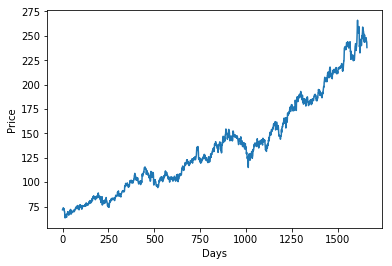

In [9]:
#dates = pd.to_datetime(df['Date'] , format='%Y%m%d')
plt.plot(df['Close'])
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [10]:
batch_size= 128
LR= 0.001
epoch= 300
input_size= 10
time_steps= 6
sd = 5

In [11]:

    
model =Sequential()
model.add(LSTM(
            batch_input_shape=(batch_size,time_steps,input_size),
            output_dim=256,
            return_sequences=True,
            stateful=False,
        ))
model.add(Dropout(0.6))
model.add(LSTM(
        output_dim=128,
            return_sequences=False,
            stateful=False,
         ))
model.add(Dropout(0.6))
model.add(Dense(256))
model.add(Dropout(0.4))
model.add(Dense(128))
model.add(Dropout(0.4))
model.add(Dense(64))
model.add(Dropout(0.4))
model.add(Dense(2,activation='softmax'))
adam = Adam(LR)
#     model.summary()
model.compile(optimizer=adam,
                  loss='categorical_crossentropy',metrics=['accuracy'])
X_t_batch_train,Y_t_batch_train,X_t_batch_test,Y_t_batch_test,df=batch_data(time_steps,-sd,batch_size)
train_history=model.fit(X_t_batch_train, Y_t_batch_train, epochs=epoch, batch_size=batch_size,verbose=0,validation_data=(X_t_batch_test,Y_t_batch_test),shuffle=True)
plt.plot(train_history.history['acc'],color='black')
plt.plot(train_history.history['val_acc'],color='red')

plt.show()
days=[5,10,15,20,25,30,35,40,45,50,55,60]
pre = model.predict(X_t_batch_test,batch_size=batch_size)
pre = np.where(pre>0.5,1,0)
pre1 = pre[:,1]
Y_t_batch_test1 = Y_t_batch_test[:,1] 
Y_t_batch_test1=Y_t_batch_test1.astype(int)
days=[0,5,10,15,20,25,30,35,40,45,50,55,60]
pd.crosstab(pre1[:5],Y_t_batch_test1[:5],rownames=['label'],colnames=['pre'])
for i in days:
    print('predict_days:',i,'-',i+5)
    print('-----------')
    print("pre :",pre1[i:i+5])
    print("Y   :",Y_t_batch_test1[i:i+5])
    print((1-sum((pre1[i:i+5]-Y_t_batch_test1[i:i+5])**2)/5))

    print('\n\n')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=(128, 6, 1..., return_sequences=True, stateful=False, units=256)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, stateful=False, units=128)`
  


NameError: name 'X_t_batch_train' is not defined

In [50]:
score = model.evaluate(X_t_batch_test,Y_t_batch_test, verbose=1)
print('score:', score)

ValueError: Cannot feed value of shape (32, 6, 10) for Tensor 'lstm_19_input:0', which has shape '(128, 6, 10)'

In [49]:
Y_t_batch_test.shape
X_t_batch_test.shape

(128, 2)

/home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  warnings.warn(message, mplDeprecation, stacklevel=1)


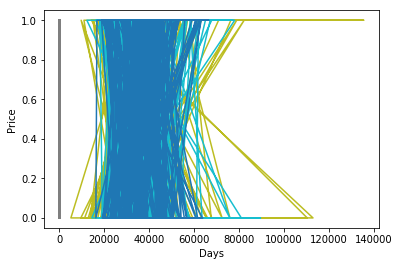

In [35]:
plt.plot(X_test , Y_test)
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [ ]:
# def batch_data(stock_num, time_steps,sd,batch_size):
#     df = pd.read_csv("data/2330.csv")
    
    
#     del df['Data']
   
    
    
#     df['Vol']= df['Vol'].astype('float')
#     df['Open'] = df['Open'].astype('float')
#     df['High'] = df['High'].astype('float')
#     df['Low'] = df['Low'].astype('float')
#     df['Close'] = df['Close'].astype('float')
#     df['SMA5'] = df['SMA5'].astype('float')
#     df['SMA10'] = df['SMA10'].astype('float')
#     df['SMA20'] = df['SMA20'].astype('float')
#     df['SMA60'] = df['SMA60'].astype('float')
#     df['MA5'] = df['MA5'].astype('float')
#     df['MA10'] = df['MA10'].astype('float')
    
    
#     df['label']=(df['Close'].shift(sd)-df['Close']>=0).astype(int)

    
#     Y =df['label']

#     Y = np_utils.to_categorical(Y)

#     X = df[['Vol','Open','High','Low','Close','MA5','MA10','SMA5','SMA10','SMA20']]